# 교차 검증
- 부족한 데이터 셋 및 특정 데이터에 과적합되는 문제 해결하기 위한 방안
- 학습 데이터셋을 일정 크기의 데이터로 n개 분리 후 1/n은 검증, 나머지는 학습용으로 사용
- 데이터 ㅈㄴ 많으면 안해도 됨!!! 제발!! 

## <hr>1. 모듈 로딩

In [3]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

# KFold 인스턴스 생성 => 데이터를 2개로 분할해주는 객체
kf = KFold(n_splits=2)


KFold(n_splits=2, random_state=None, shuffle=False)
Fold 0:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2 3]


In [ ]:
# 데이터 분할
datasets = kf.splits(X, y)

for dataset in datasets:
    print(dataset)

In [ ]:

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

In [5]:
import pandas as pd

perchDF = pd.read_csv("../data/perch3.csv")
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [25]:
# perchDF => 5등분
fold_5 = KFold(n_splits=5)
datasets = fold_5.split(perchDF)
print(datasets)
for idx, dataset in enumerate(datasets):
    print(f"{idx} => {dataset}")
    print() # 앞에 나오는 array가 train이고 뒤에 나오는 array가 test

<generator object _BaseKFold.split at 0x000001902A086970>
0 => (array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

1 => (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]), array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]))

2 => (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]), array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]))

3 => (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [28]:
# 비율 맞추는 것도 있음 

In [94]:
## 타겟이 분류인 경우
irisDF = pd.read_csv("../data/iris.csv")
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [104]:
k_fold = KFold(n_splits=5, shuffle=True)
ret = k_fold.split(irisDF.iloc[:,:-1])

In [105]:
# irisDF.iloc[train]

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
train_score3 = []

for p_name in ["l1", "l2", "elasticnet"]:
    for idx, (train, test) in enumerate(ret):
        # 학습용, 테스트용 인덱스 반환
        train_idx = train.tolist()
        test_idx = train.tolist()
    
        # 인덱스에 해당하는 데이터 셋 추출
        trainDF = irisDF.iloc[train_idx]
        testDF = irisDF.iloc[test_idx]
    
        # 피쳐 4개는 보내고 마지막은 남겨야함
        X_train = trainDF[trainDF.columns[:-1]]
        y_train = trainDF[trainDF.columns[-1]]
    
        X_test = testDF[testDF.columns[:-1]]
        y_test = testDF[testDF.columns[-1]]
    
        # 분류 모델 학습 
        log_model = LogisticRegression(max_iter=1000, solver="liblinear", penalty=p_name)
        log_model.fit(X_train, y_train)
    
        # 훈련 및 검증용 성능
        train_score = log_model.score(X_train, y_train)
        test_score = log_model.score(X_train, y_test)
    
        train_score3.append(train_score)

        # 예측
        y_pred = log_model.predict()

In [64]:
'''
# generate는 한 번 쓰면 못쓰요
variety_ratio = []
for idx, (train, test) in enumerate(ret):
    # print(idx, train, test)
    print("="*30, f"{idx}번", "="*30)
    variety_ratio.append(irisDF.iloc[train, -1].value_counts())
    print(irisDF.iloc[train, -1].value_counts())
'''

============================== 0번 ==============================
variety
Setosa        42
Virginica     41
Versicolor    37
Name: count, dtype: int64
============================== 1번 ==============================
variety
Virginica     41
Versicolor    40
Setosa        39
Name: count, dtype: int64
============================== 2번 ==============================
variety
Versicolor    43
Setosa        39
Virginica     38
Name: count, dtype: int64
============================== 3번 ==============================
variety
Setosa        41
Versicolor    40
Virginica     39
Name: count, dtype: int64
============================== 4번 ==============================
variety
Virginica     41
Versicolor    40
Setosa        39
Name: count, dtype: int64


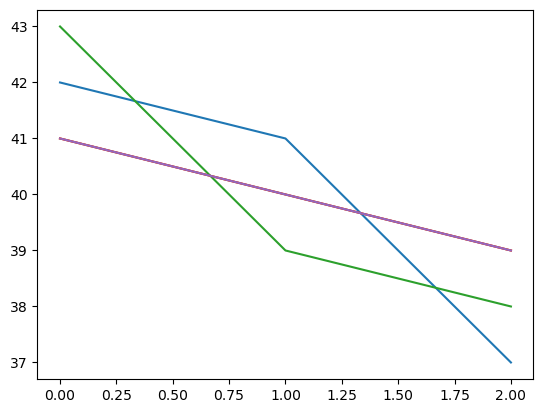

In [74]:
import matplotlib.pyplot as plt

for data in variety_ratio:
    plt.plot(list(data))

plt.show()

In [72]:
list(data)

[42, 41, 37]

In [109]:
sum(train_score3)/3

1.5999999999999999